In [475]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from scipy.stats import expon
from sklearn.impute import KNNImputer

df = pd.read_excel("DataSet.xlsx")

In [476]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,480.000000,506.000000,506.000000,506.000000,479.000000,506.000000,506.000000,506.000000,486.000000,506.000000,452.000000
mean,1.269195,13.295257,9.205158,0.175000,1.101175,15.679800,58.744660,6.211663,78.063241,339.317787,42.614980,336.820947,11.537806,23.750442
std,2.399207,23.048697,7.169630,0.380364,1.646991,27.220206,33.104049,6.527286,203.542157,180.670077,87.585243,121.174519,6.064932,8.808602
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.049443,0.000000,3.440000,0.000000,0.449000,5.961500,32.000000,2.425900,4.000000,254.000000,17.000000,370.415000,6.877500,18.500000
50%,0.144655,0.000000,6.960000,0.000000,0.538000,6.322500,65.250000,3.917500,5.000000,307.000000,18.900000,390.885000,10.380000,21.950000
75%,0.819623,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.341400,24.000000,403.000000,20.200000,395.630000,15.015000,26.600000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


In [477]:
missing_per_column = df.isnull().sum()
print(missing_per_column)

CRIM        0
ZN          0
INDUS       0
CHAS       26
NOX         0
RM          0
AGE         0
DIS        27
RAD         0
TAX         0
PTRATIO     0
B          20
LSTAT       0
MEDV       54
dtype: int64


In [478]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

CRIM        0.000000
ZN          0.000000
INDUS       0.000000
CHAS        5.138340
NOX         0.000000
RM          0.000000
AGE         0.000000
DIS         5.335968
RAD         0.000000
TAX         0.000000
PTRATIO     0.000000
B           3.952569
LSTAT       0.000000
MEDV       10.671937
dtype: float64


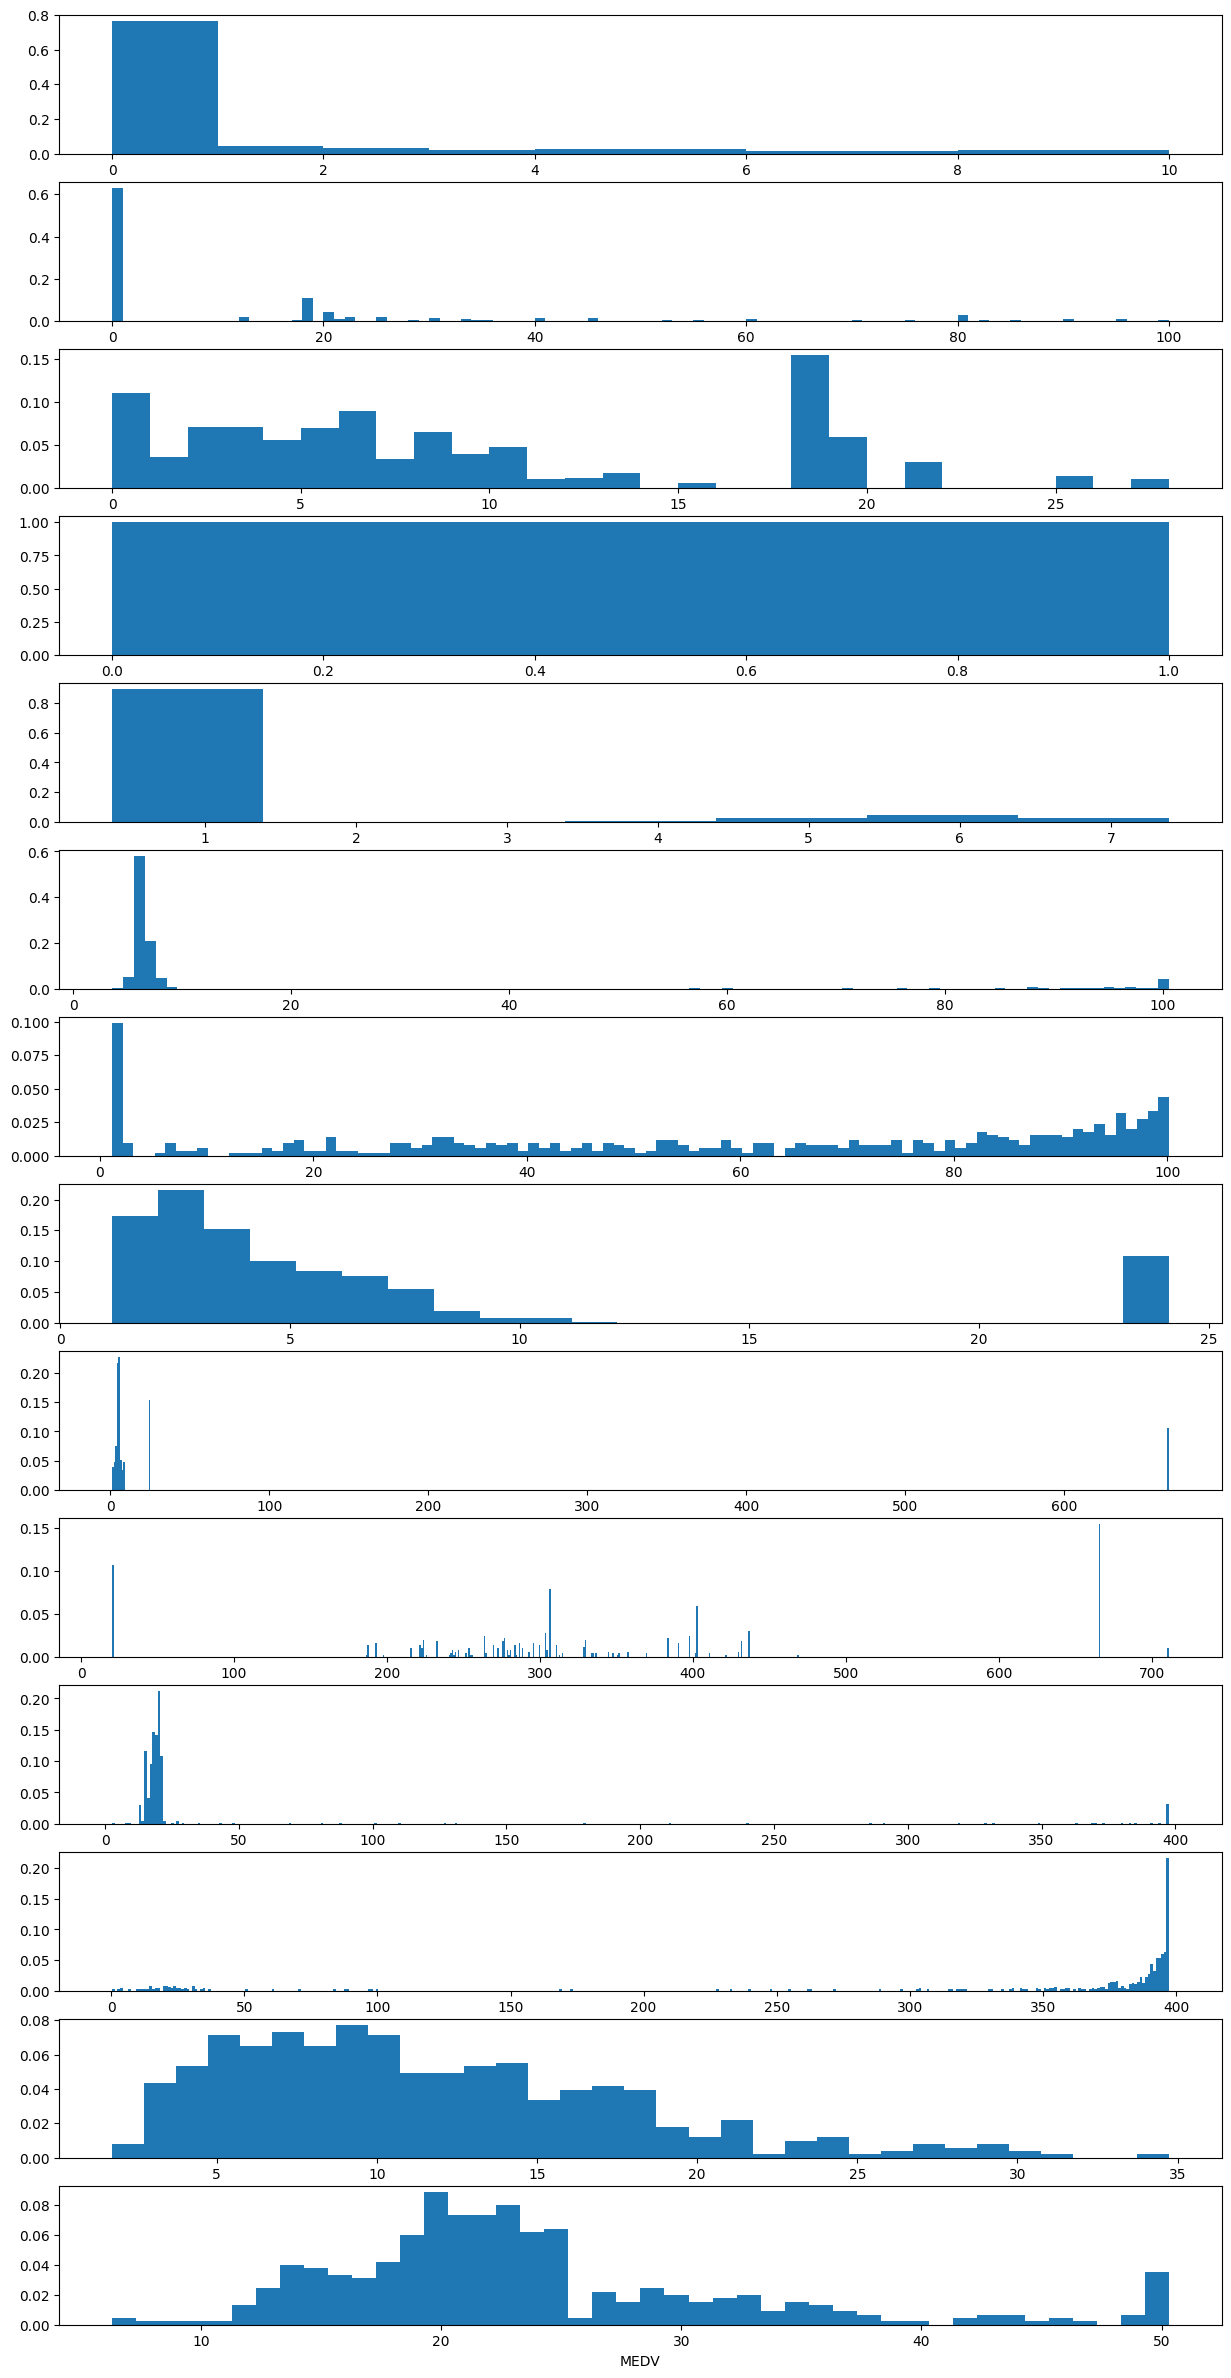

In [479]:
fig, ax = plt.subplots(ncols=1, nrows=14, figsize=(15, 30))

for i in range(len(df.columns)):
    ax[i].hist(df[df.columns[i]], bins=np.arange(min(df[df.columns[i]]), max(df[df.columns[i]])+1), density=True)
    ax[i].set_xlabel(df.columns[i])
    df.columns
    

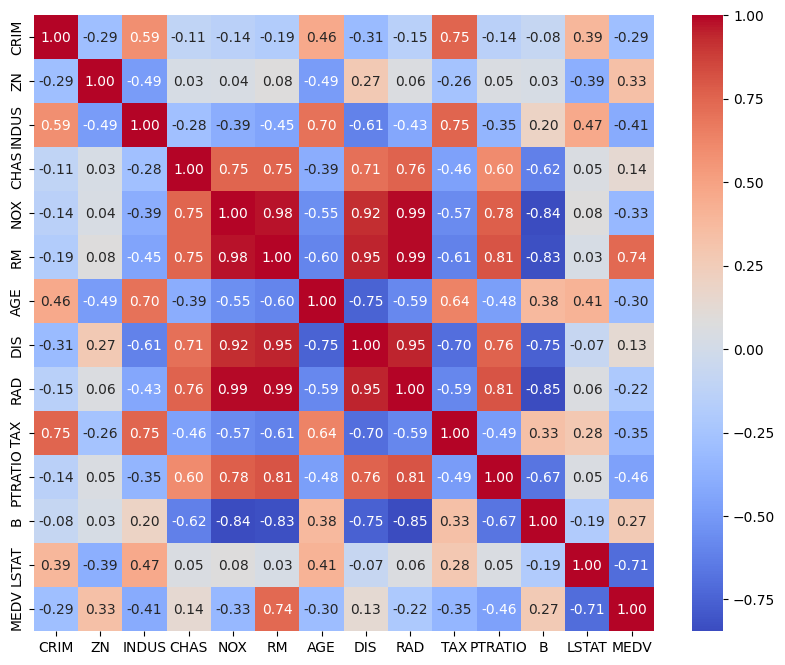

In [480]:
correlation_graph = df.corr()
plt.figure(figsize=(10,8))
plt.tight_layout()
sns.heatmap(correlation_graph,cmap='coolwarm' ,fmt=".2f",annot=True)
plt.show()

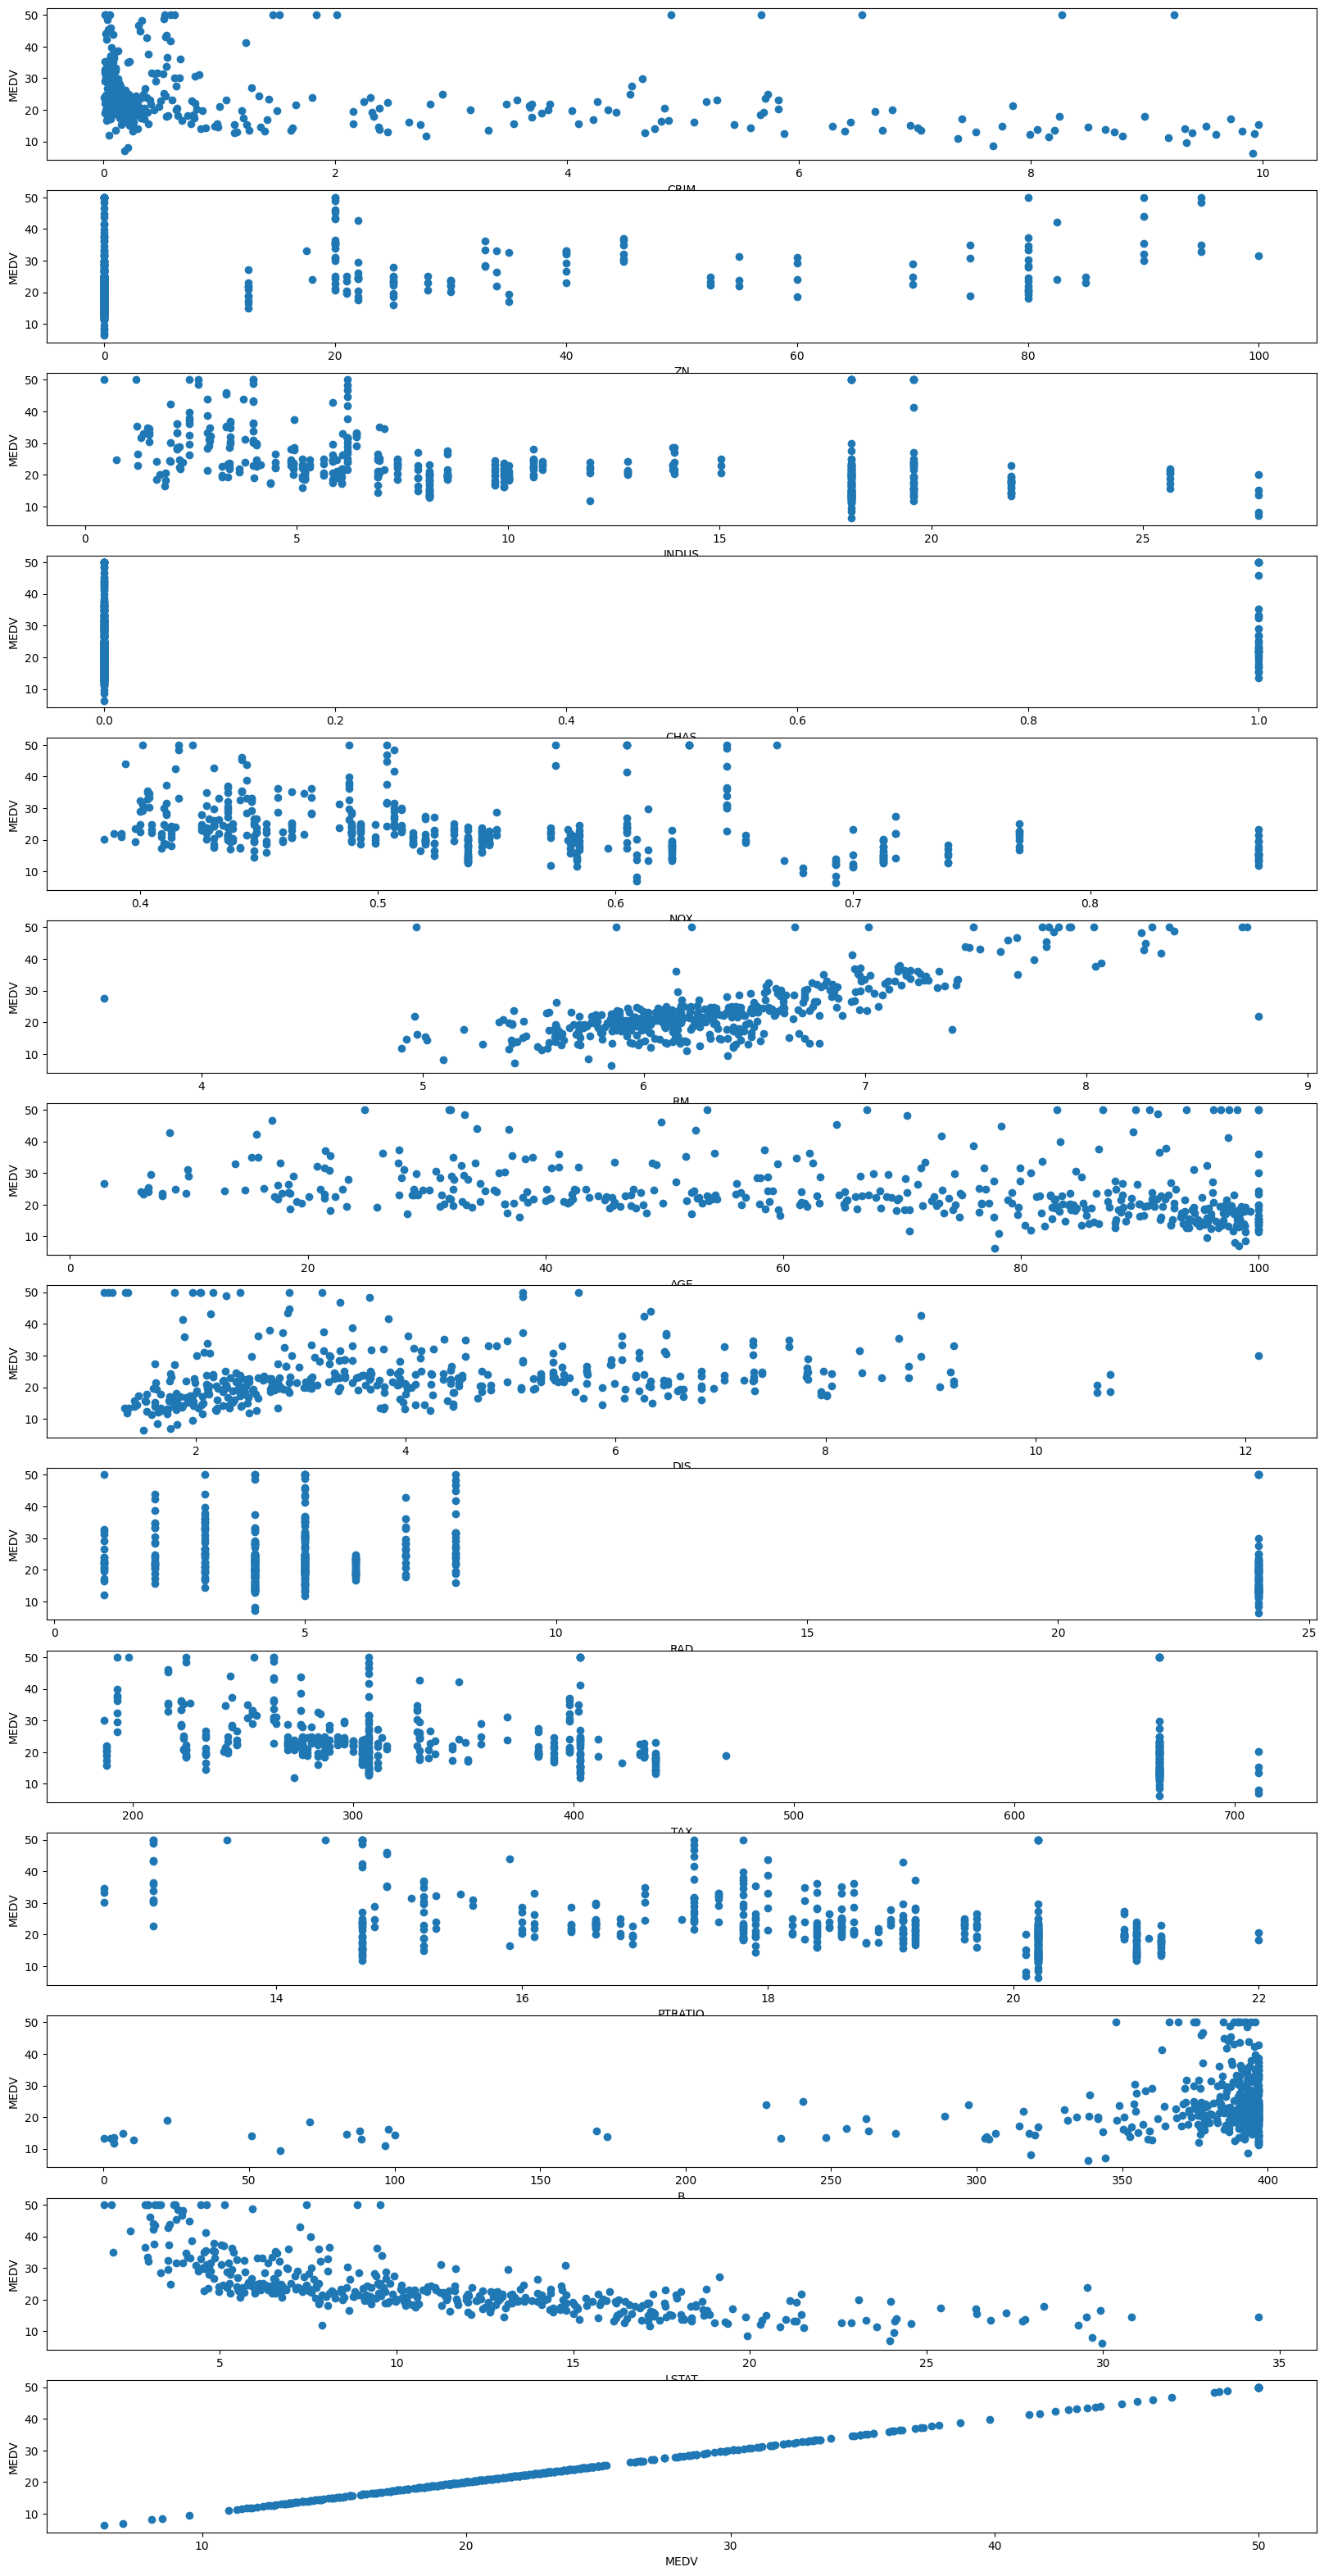

In [481]:
fig, ax = plt.subplots(ncols=1, nrows=14, figsize=(20, 40))
for i in range(len(df.columns)):
    ax[i].scatter(df[df.columns[i]], df['MEDV'])
    ax[i].set_xlabel(df.columns[i])
    ax[i].set_ylabel('MEDV')

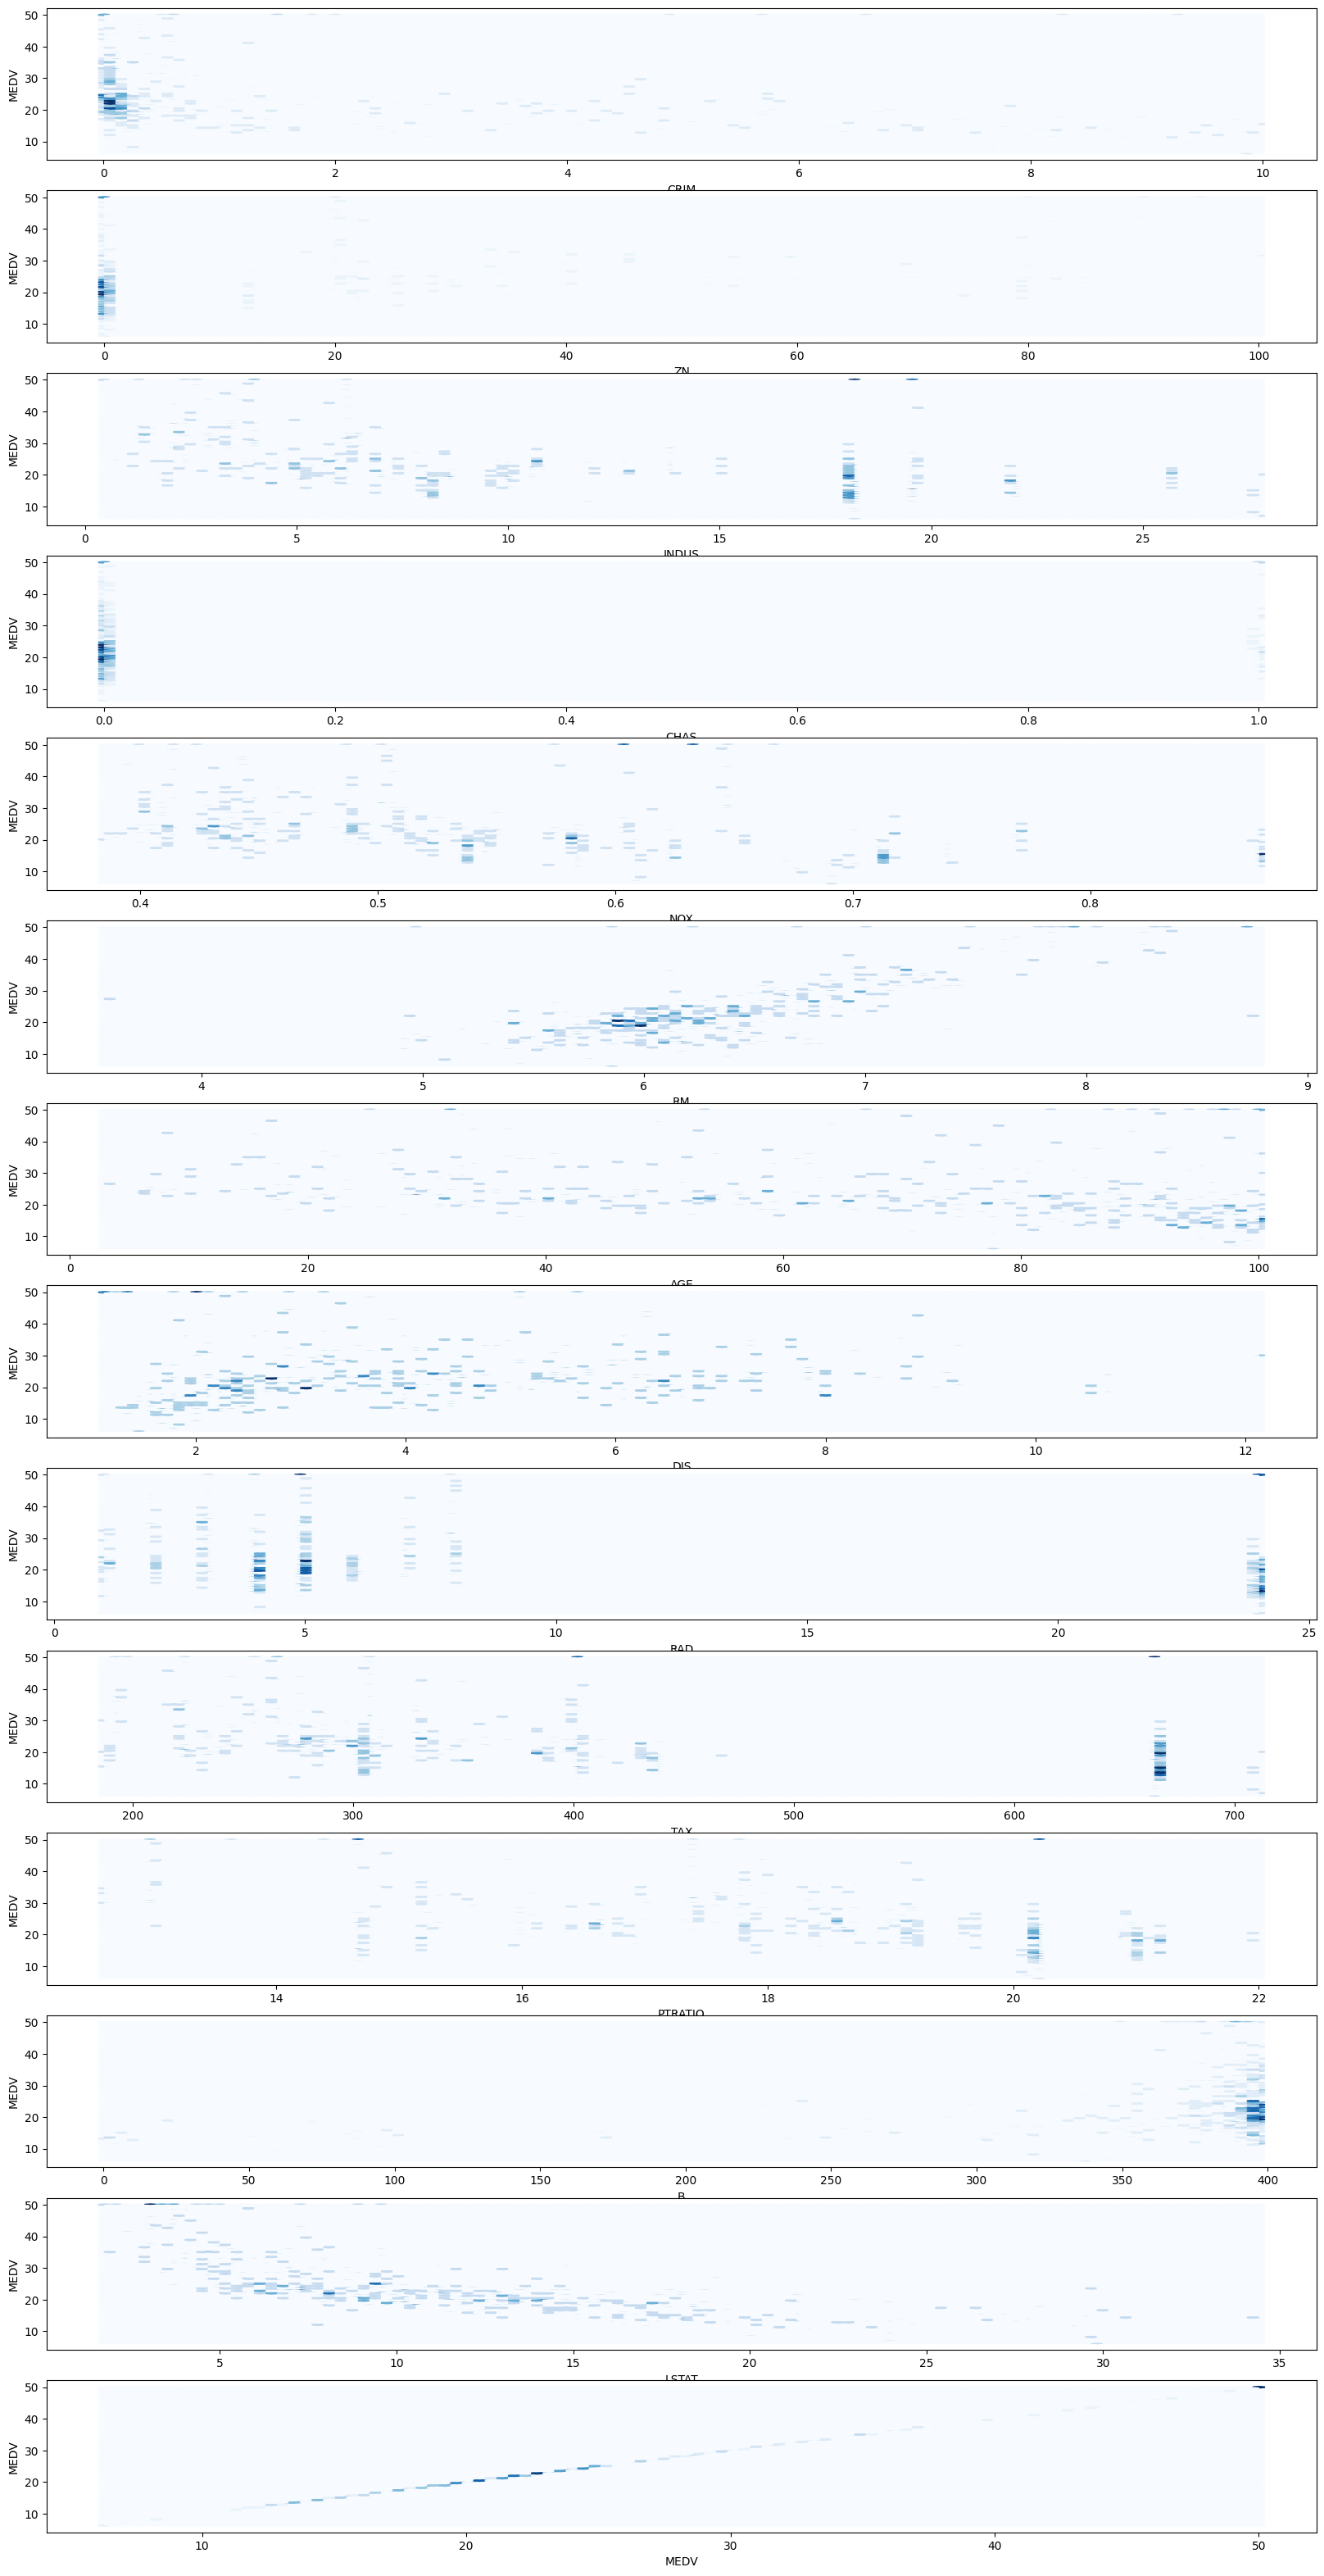

In [482]:
fig, ax = plt.subplots(ncols=1, nrows=14, figsize=(20, 40))
for i in range(len(df.columns)):
    ax[i].hexbin(df[df.columns[i]],df['MEDV'],cmap='Blues')
    ax[i].set_xlabel(df.columns[i])
    ax[i].set_ylabel('MEDV')

In [483]:
cvar = df.var()
print(cvar)

CRIM           5.756194
ZN           531.242433
INDUS         51.403589
CHAS           0.144676
NOX            2.712578
RM           740.939612
AGE         1095.878071
DIS           42.605466
RAD        41429.409854
TAX        32641.676554
PTRATIO     7671.174819
B          14683.263997
LSTAT         36.783399
MEDV          77.591463
dtype: float64


PREPROCCESING

-Replace with a constant
-Using Mean, Medium or Mode
-KNN

4 columns with missing value (CHAS,DIS,B,MEDV)

Replace with a constant for CHAS because of the low cov

In [484]:
imputer = KNNImputer(n_neighbors=5)

df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df['CHAS']  = df['CHAS'].fillna(df['CHAS'].mode()[0])
df['DIS'] = df['DIS'].fillna(df['DIS'].mean())
df['B'] = df_imputed['B']
df['MEDV'] = df_imputed['MEDV']
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.269195,13.295257,9.205158,0.166008,1.101175,15.679800,58.744660,6.211663,78.063241,339.317787,42.614980,332.741107,11.537806,24.097352
std,2.399207,23.048697,7.169630,0.372456,1.646991,27.220206,33.104049,6.350398,203.542157,180.670077,87.585243,125.289897,6.064932,8.546710
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.049443,0.000000,3.440000,0.000000,0.449000,5.961500,32.000000,2.471800,4.000000,254.000000,17.000000,364.385000,6.877500,19.000000
50%,0.144655,0.000000,6.960000,0.000000,0.538000,6.322500,65.250000,4.026850,5.000000,307.000000,18.900000,390.690000,10.380000,22.260000
75%,0.819623,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.256850,24.000000,403.000000,20.200000,395.597500,15.015000,28.700000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


In [485]:
df = df.drop(["CHAS"], axis=1)

In [486]:
def normalize_data(data):
    min_, max_ = data.min(), data.max()
    return (data - min_) / (max_ - min_)
def standardize_data(data):
    mean, std = data.mean(), data.std()
    return (data - mean) / std

df = df.apply(lambda x: normalize_data(x))
#df = df.apply(lambda x: standardize_data(x))
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.127346,0.132953,0.331837,0.103374,0.125663,0.582702,0.222211,0.115885,0.461954,0.101484,0.838220,0.300116,0.407262
std,0.240726,0.230487,0.258458,0.237730,0.282253,0.334848,0.277669,0.306078,0.261537,0.222128,0.315926,0.185585,0.195577
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.004961,0.000000,0.124009,0.009238,0.024891,0.312179,0.058687,0.004511,0.338448,0.036520,0.918011,0.157512,0.290618
50%,0.014514,0.000000,0.250901,0.022084,0.028635,0.648503,0.126681,0.006015,0.415171,0.041339,0.984341,0.264688,0.365217
75%,0.082237,0.181000,0.652487,0.037818,0.035131,0.898597,0.224187,0.034586,0.554140,0.044636,0.996716,0.406518,0.512586
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [487]:
train = df.loc[np.random.choice(df.index, round(len(df) * 0.8), replace=False)].reset_index(drop=True)
test = df.drop(np.random.choice(df.index, round(len(df) * 0.8), replace=False)).reset_index(drop=True)
#valid

# Linear Regression

Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$



Based on the above formula, implement the function below to compute the parameters of a simple linear regression

In [488]:
def linear_regression(input_, output_):
  input_mean = sum(input_) / len(input_)
  output_mean = sum(output_) / len(output_)
  xx_mean = sum([(input_[i] ) ** 2 for i in range(len(input_))])
  xy_mean = sum([(input_[i] )  * (output_[i] ) for i in range(len(input_))])
  slope = (input_mean * output_mean - xy_mean) / (input_mean * input_mean - xx_mean)
  bias = output_mean - slope * input_mean
  return slope, bias

intercepts = []
slopes = []
for i in range(len(df.columns)):
      slope,intercept= linear_regression(train[df.columns[i]],train['MEDV'])
      intercepts.append(intercept)
      slopes.append(slope)

Now complete this `get_regression_predictions(...)` function to predict the value of given data based on the calculated intercept and slope

In [489]:
def get_regression_predictions(input_, intercept, slope):
    predictions = sum([ intercept + slope * input_])
    return predictions
preds = []
for i in range(len(df.columns)):
    preds.append(get_regression_predictions(test[df.columns[i]],intercepts[i],slopes[i]))

Now that we have a model and can make predictions, let's evaluate our model using Root Mean Square Error (RMSE). RMSE is the square root of the mean of the squared differences between the residuals, and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

In [490]:
def get_root_mean_square_error(predicted_values, actual_values):
    SSr = 0 
    for i in range(len(actual_values)):
        SSr += (actual_values[i] - predicted_values[i])**2
    MSE = SSr / len(actual_values)
    return np.sqrt(MSE)

The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

Complete the following function to calculate the R2 score of a given input_feature, output, bias, and slope:

In [491]:
def get_r2_score(predicted_values, actual_values):
    SSr, SSt = 0, 0
    for i in range(len(y_true)):
        SSr += (actual_values[i] - predicted_values[i]) ** 2
        SSt += (actual_values[i] - np.mean(actual_values)) ** 2
    return 1 - (SSr / SSt)


Now calculate the fitness of the model.
Remember to provide explanation for the outputs in your code!

In [492]:
designated_feature_list = []
y_true = test['MEDV']
for i in range(len(df.columns)):
      RMSE = get_root_mean_square_error(preds[i], y_true)
      R2 = get_r2_score(preds[i], y_true)
      designated_feature_list.append([RMSE,R2])
for feature in designated_feature_list:
  print(feature)

[0.27379457969719495, -0.7834629820701051]
[0.2212410909800858, -0.16451742100360156]
[0.3039039037830656, -1.1972879031380006]
[0.2509594013893781, -0.4983778578667033]
[0.2506823080352328, -0.4950708581634473]
[0.28738434247898487, -0.9649007245710917]
[0.288833120064345, -0.9847617899476793]
[0.24607207122281738, -0.4405855582552318]
[0.301600869603191, -1.164111266078852]
[0.2648934414857655, -0.6693861978971936]
[0.24001120083502267, -0.3704949095585295]
[0.3131257153929951, -1.3326623405839246]
[0.0, 1.0]


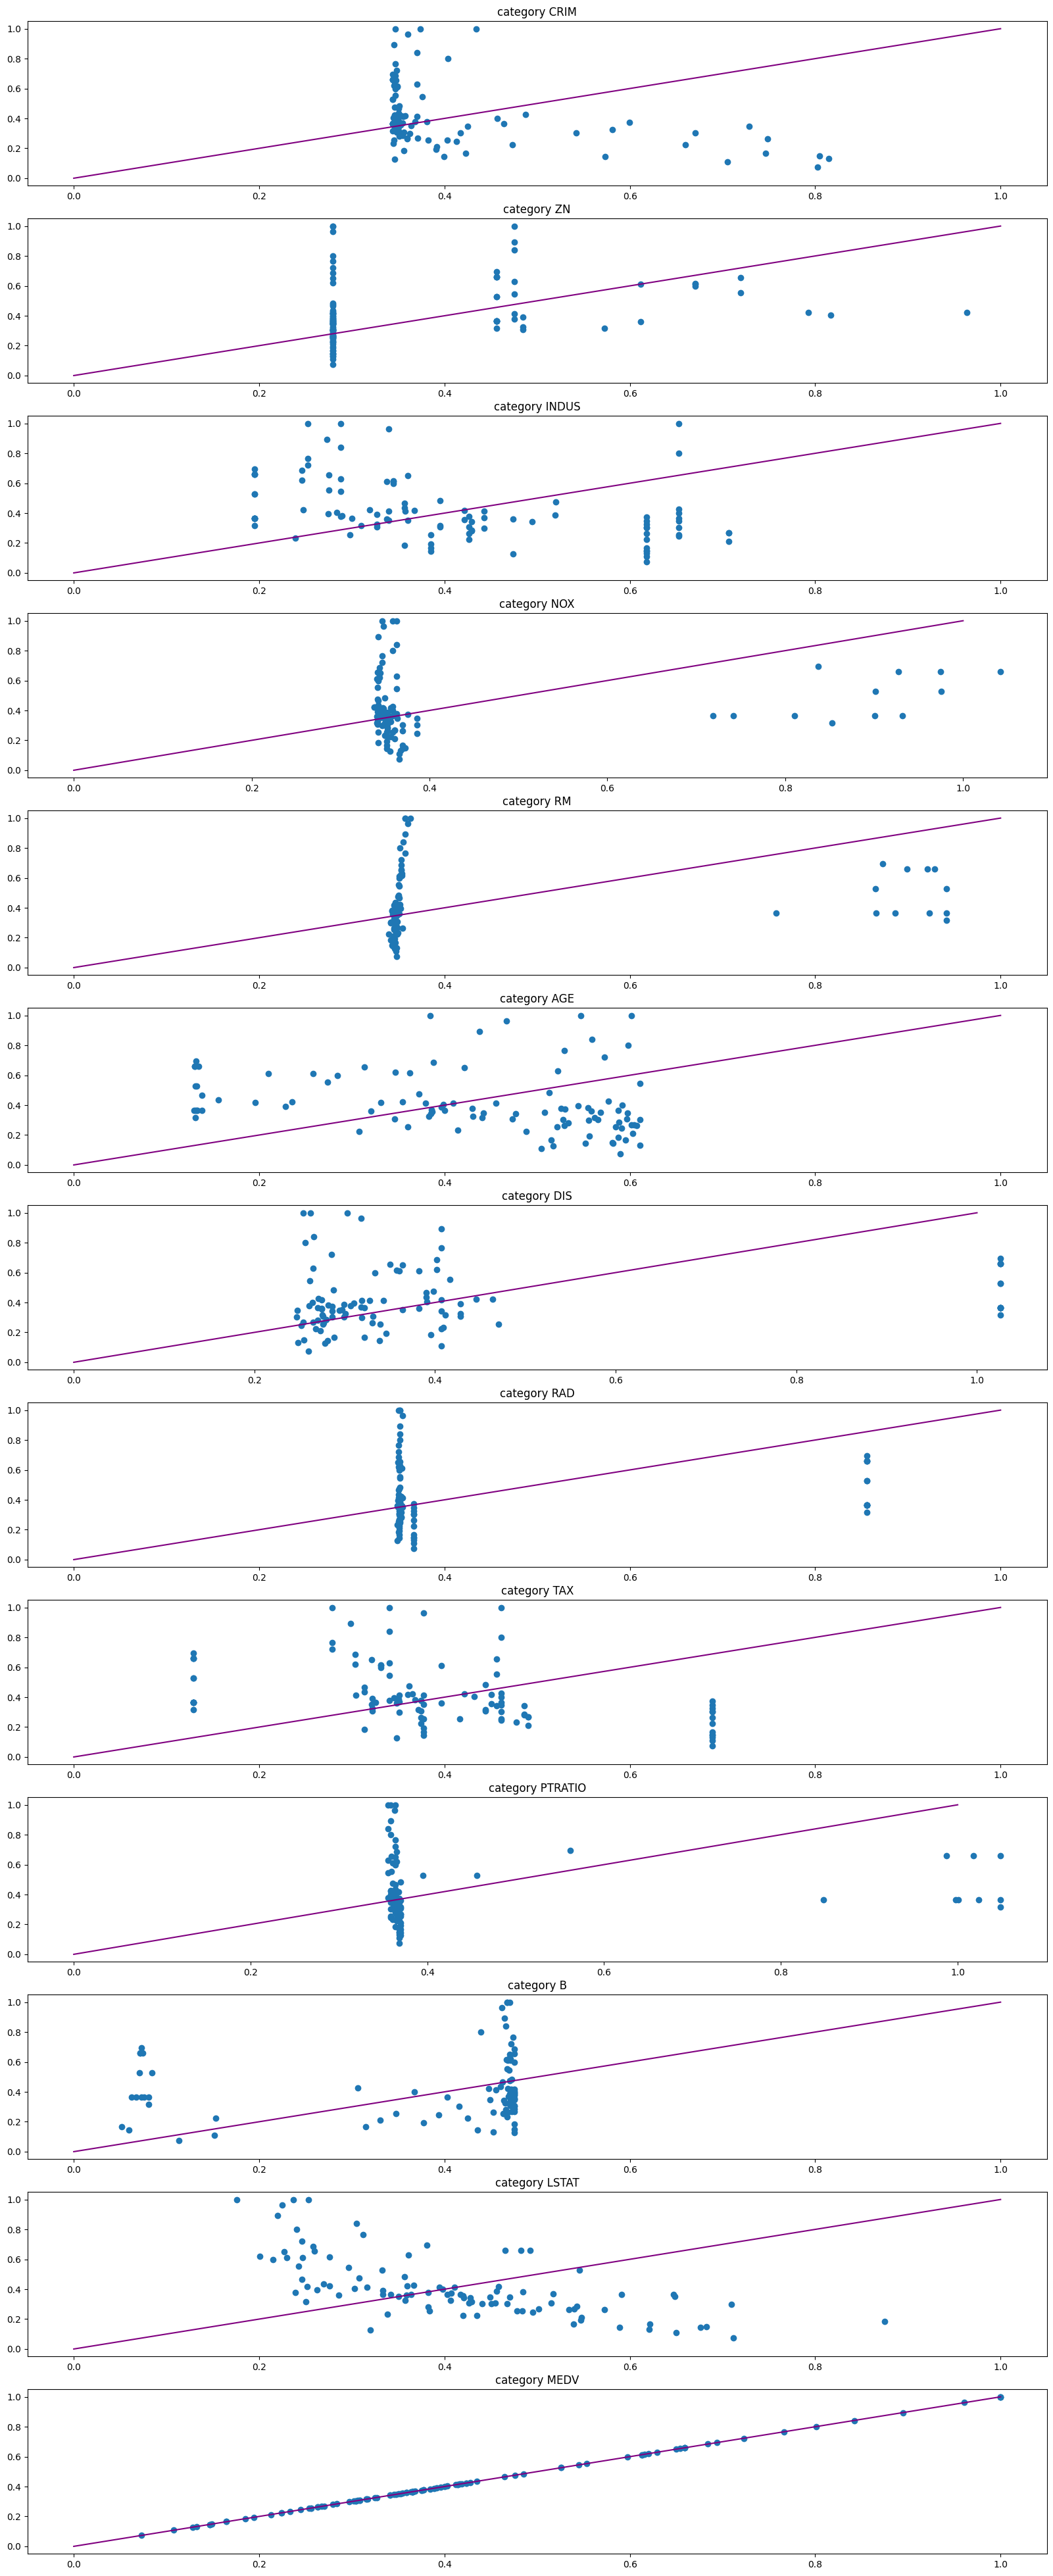

In [493]:
fig, ax = plt.subplots(ncols=ncol, nrows=len(df.columns), figsize=(20, 50))
for i in range(len(df.columns)):
    y_ = preds[i]        
    x_ = np.linspace(0, 1, 100)
    ax[i].scatter(y_,test['MEDV'])
    ax[i].plot(x_, x_, color='purple')
    ax[i].set_title(f"category {df.columns[i]}")

Classification

In [494]:
bins = [-0.1, 2.1, 7.9,  10.1]
labels = ['Low', 'Mid', 'High']

lst = pd.qcut(df['MEDV'], 10, labels=False)
df['MEDVCategory'] = pd.cut(lst, bins, labels=labels)


In [495]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("MEDVCategory", axis=1), df["MEDVCategory"], train_size=0.8, random_state=20)
KNN = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
print(accuracy_score(y_true=y_test, y_pred=KNN.predict(X_test)))
Decision_Tree = DecisionTreeClassifier(random_state=20, max_depth=5, max_leaf_nodes=7, max_features=5).fit(X_train, y_train)
print(accuracy_score(y_true=y_test, y_pred=Decision_Tree.predict(X_test)))


0.7549019607843137
0.9803921568627451


In [496]:
def GridSearchCV_func(model, param_grid):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    
KNN_parameters = {'n_neighbors': [2,3,4,5,7,8,10,12],'weights': ['uniform', 'distance'],'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
DT_parameters = {'max_depth': [1,3,5,7,9],'min_samples_split': [2,3,5,7],'min_samples_leaf': [1,2,3,4,5],'criterion': ['gini', 'entropy']}
GridSearchCV_func(KNeighborsClassifier(), KNN_parameters)
GridSearchCV_func(DecisionTreeClassifier(), DT_parameters)



{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
0.8589506172839506
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.9950617283950617


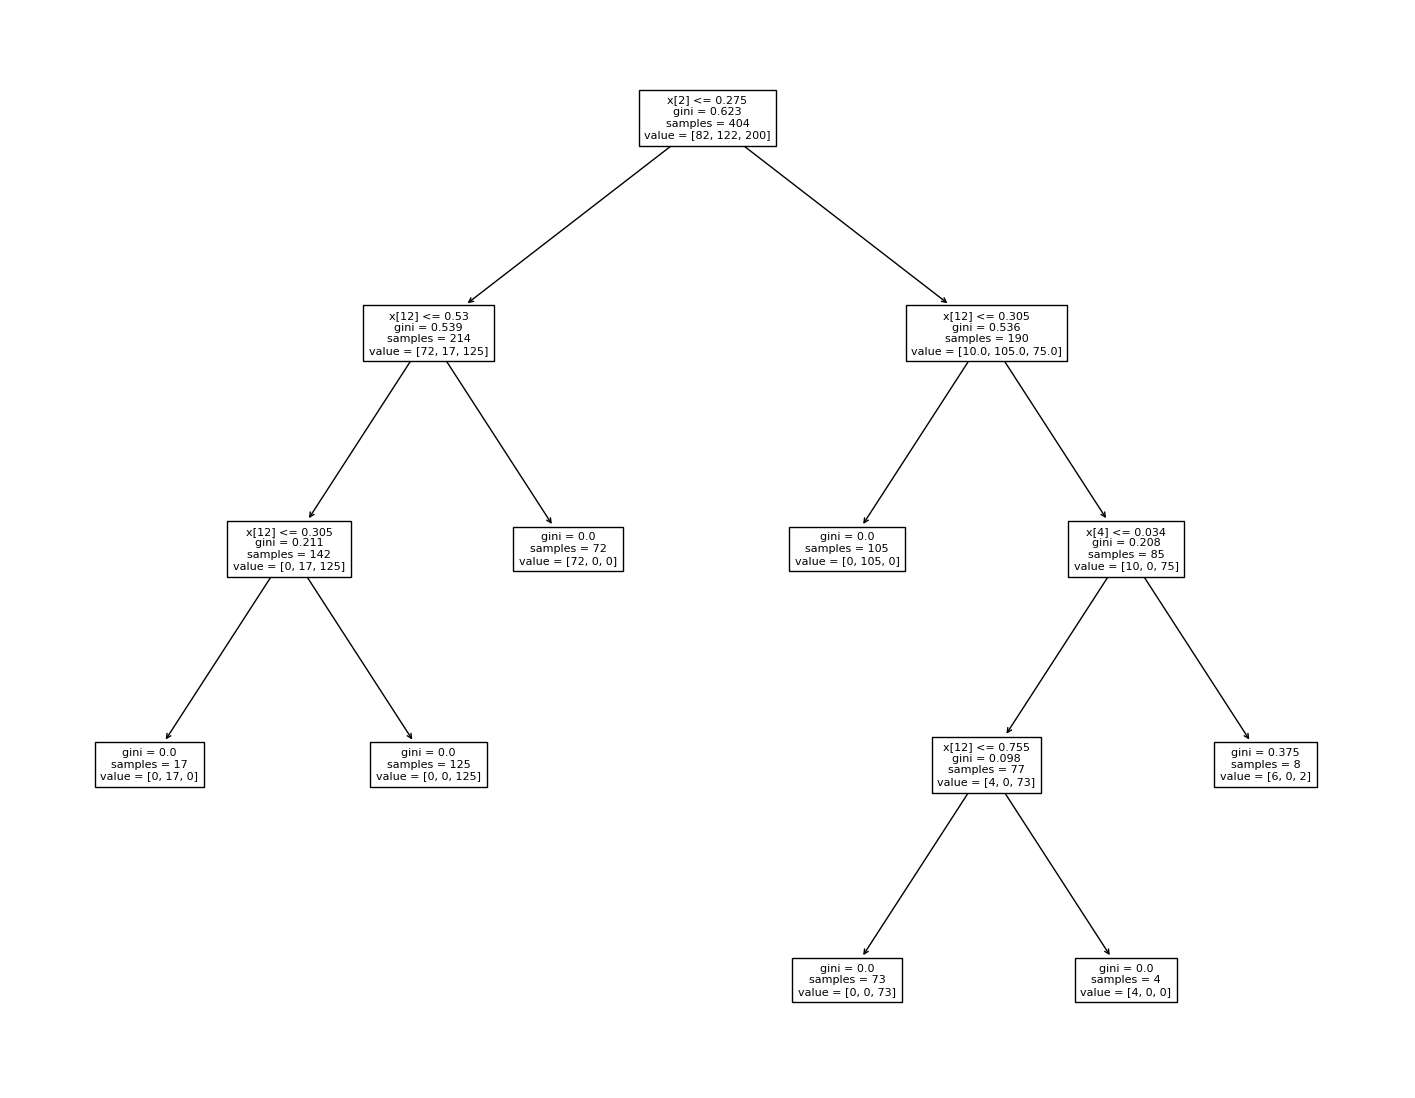

In [497]:
plt.figure(figsize=(18, 14))  
plot_tree(Decision_Tree, fontsize=8)  
plt.show()

Ensemble

n_estimators: num trees

criterion: measuring the quality of a split

max_depth: maximum depth of the tree

max_features: number of features for the best split

bootstrap: using bootstrap 

In [498]:
Random_Forest_parameters = {'n_estimators': [50,100,125],'criterion': ['gini', 'entropy', 'log_loss'],'max_depth': [2,5,7],'max_features': [5,10],"bootstrap": [False, True]}
GridSearchCV_func(model=RandomForestClassifier(), param_grid=Random_Forest_parameters)


{'bootstrap': False, 'criterion': 'gini', 'max_depth': 2, 'max_features': 10, 'n_estimators': 50}
0.9950617283950617


In [499]:
Random_Forest = RandomForestClassifier(n_estimators=50, criterion="gini", max_depth=2, max_features=10, bootstrap=False)
Random_Forest.fit(X=X_train, y=y_train)

RandomForestClassifier(bootstrap=False, max_depth=2, max_features=10,
                       n_estimators=50)

SVM

In [500]:
SVC_linear = SVC(kernel='linear').fit(X_train, y_train)
SVC_RBF = SVC(kernel='rbf', gamma='auto').fit(X_train, y_train)


In [501]:
SVC_pred = SVC_linear.predict(X=X_test)
confusion_matrix(y_true=y_test, y_pred=SVC_pred)

array([[13,  0,  3],
       [ 0, 21, 10],
       [ 0,  4, 51]], dtype=int64)

In [502]:
SVC_pred = SVC_RBF.predict(X=X_test)
confusion_matrix(y_true=y_test, y_pred=SVC_pred)

array([[ 7,  0,  9],
       [ 0, 18, 13],
       [ 0, 10, 45]], dtype=int64)

Analizing Models

In [503]:
models = [Decision_Tree,KNN,Random_Forest,SVC_linear,SVC_RBF]
names= ['Decision Tree','KNN','Random Forest','SVC linear','SVC RBF']
for i in range(len(models)):
    pred = models[i].predict(X=X_test)
    print(names[i])
    print('Accuracy                     Precision                    Recall                          F1')
    print(accuracy_score(y_test,pred),precision_score(y_test,pred, average="weighted"),recall_score(y_test,pred, average="weighted"),f1_score(y_test,pred, average="weighted"))
    
    

Decision Tree
Accuracy                     Precision                    Recall                          F1
0.9803921568627451 0.9803921568627451 0.9803921568627451 0.9803921568627451
KNN
Accuracy                     Precision                    Recall                          F1
0.7549019607843137 0.7696710942441493 0.7549019607843137 0.7539197828493874
Random Forest
Accuracy                     Precision                    Recall                          F1
0.9901960784313726 0.9903711484593837 0.9901960784313726 0.9900821124730044
SVC linear
Accuracy                     Precision                    Recall                          F1
0.8333333333333334 0.841844362745098 0.8333333333333334 0.8307616149908238
SVC RBF
Accuracy                     Precision                    Recall                          F1
0.6862745098039216 0.7144006856473933 0.6862745098039216 0.6787074035673923
